In [6]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    classification_report,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_json("data/news_corpus.jsonl", lines=True)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (5000, 3)


,title,text,label
0,German Social Democrats face pressure over coa...,BERLIN (Reuters) - Germany s Social Democrats ...,1
1,"U.S. diplomatic delays, Trump agenda snarl Ita...",ROME (Reuters) - Italy’s preparations for host...,1
2,Trump taps Retired General Kelly to lead Homel...,WASHINGTON (Reuters) - Republican U.S. Preside...,1
3,Texas Republicans Cut Environmental Regulatio...,A disgusting black sludge is coming out of res...,0
4,Trump attacks FBI on leakers of Russia reports...,WASHINGTON (Reuters) - U.S. President Donald T...,1


In [8]:
X_text = df["text"]
y = df["label"]

vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X = vectorizer.fit_transform(X_text)

print("TF-IDF shape:", X.shape)

TF-IDF shape: (5000, 5000)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 4000
Test size: 1000


In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

r2 = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lr)

print("===== LINEAR REGRESSION RESULTS =====")
print("R2:", round(r2, 4))
print("RMSE:", round(rmse, 4))
print("MAE:", round(mae, 4))

===== LINEAR REGRESSION RESULTS =====
R2: 0.3815
RMSE: 0.3932
MAE: 0.3069


In [11]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("===== RANDOM FOREST RESULTS =====")
print("R2:", round(r2_rf, 4))
print("RMSE:", round(rmse_rf, 4))
print("MAE:", round(mae_rf, 4))

===== RANDOM FOREST RESULTS =====
R2: 0.9682
RMSE: 0.0891
MAE: 0.015


In [12]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

y_pred_class = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_class)

print("===== LOGISTIC REGRESSION (CLASSIFICATION) =====")
print("Accuracy:", round(accuracy, 4))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_class))

===== LOGISTIC REGRESSION (CLASSIFICATION) =====
Accuracy: 0.969

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       507
           1       0.97      0.97      0.97       493

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



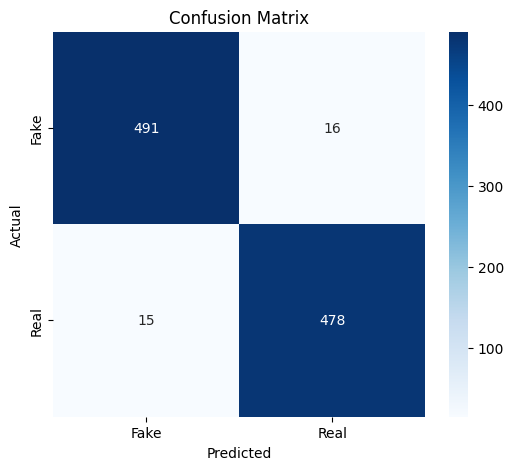

In [13]:
cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Fake","Real"],
            yticklabels=["Fake","Real"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
toon_content = "news[300]{label,text}:\n"

for _, row in df.head(300).iterrows():
    label = row["label"]
    text = row["text"][:100].replace("\n", " ") + "..."
    toon_content += f"{label},{text}\n"

with open("data/news_300.toon", "w", encoding="utf-8") as f:
    f.write(toon_content)

print("TOON file created successfully!")

TOON file created successfully!


In [15]:
print(toon_content[:500])

news[300]{label,text}:
1,BERLIN (Reuters) - Germany s Social Democrats (SPD) faced pressure on Wednesday to consider offering...
1,ROME (Reuters) - Italy’s preparations for hosting this year’s Group of Seven major powers meetings h...
1,WASHINGTON (Reuters) - Republican U.S. President-elect Donald Trump on Monday formally announced Ret...
0,A disgusting black sludge is coming out of residents  faucets in Crystal City, Texas, and the people...
1,WASHINGTON (Reuters) - U.S. President Donald Trump 


In [16]:
print("========== MODEL SUMMARY ==========")
print("Linear Regression R2:", round(r2,4))
print("Random Forest R2:", round(r2_rf,4))
print("Logistic Regression Accuracy:", round(accuracy,4))

========== MODEL SUMMARY ==========
Linear Regression R2: 0.3815
Random Forest R2: 0.9682
Logistic Regression Accuracy: 0.969
